# Figures, Axes, and Subplots
Let's say that the following expression is run inside a Jupyter notebook to create a histogram:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:

pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


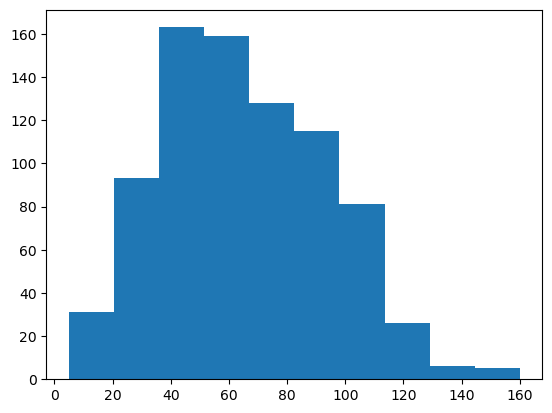

In [4]:
plt.hist(data=pokemon, x='speed');

Since we don't have a Figure area to plot inside, Python first creates a Figure object. And since the Figure doesn't start with any Axes to draw the histogram onto, an Axes object is created inside the Figure. Finally, the histogram is drawn within that Axes.

## Example 2. Demonstrate figure.add_axes() and axes.hist()

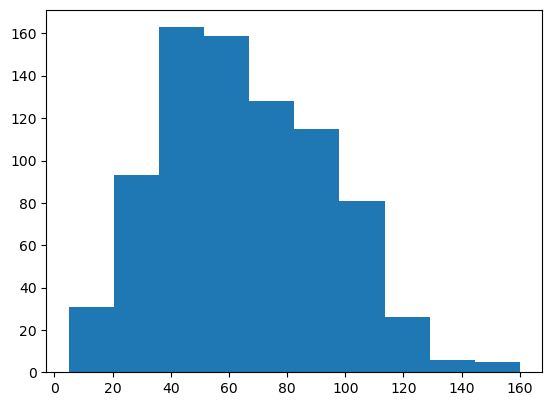

In [5]:
# Create a new figure
fig = plt.figure()

# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes.
# All quantities are in fractions of figure width and height.
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=pokemon, x='speed');

figure() creates a new Figure object, a reference to which has been stored in the variable fig. One of the Figure methods is .add_axes(), which creates a new Axes object in the Figure. The method requires one list as argument specifying the dimensions of the Axes: the first two elements of the list indicate the position of the lower-left hand corner of the Axes (in this case one quarter of the way from the lower-left corner of the Figure) and the last two elements specifying the Axes width and height, respectively. We refer to the Axes in the variable ax. Finally, we use the Axes method .hist() just like we did before with plt.hist().

To use Axes objects with seaborn, seaborn functions usually have an "ax" parameter to specify upon which Axes a plot will be drawn.

## Example 2. Use axes with seaborn.countplot()

<Axes:xlabel='generation_id', ylabel='count'>

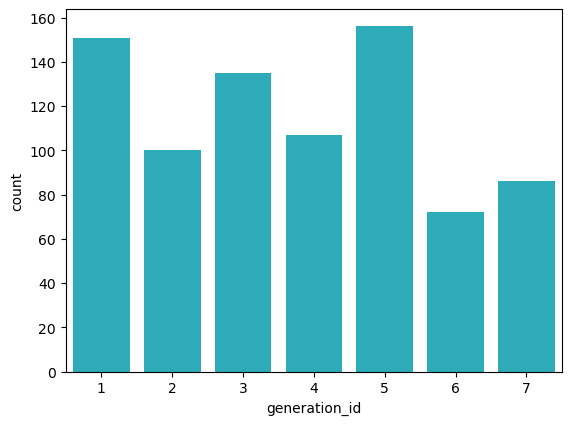

In [6]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[9]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, ax = ax)

In the above two cases, there was no purpose to explicitly go through the Figure and Axes creation steps. And indeed, in most cases, you can just use the basic matplotlib and seaborn functions as is. Each function targets a Figure or Axes, and they'll automatically target the most recent Figure or Axes worked with. As an example of this, let's review in detail how subplot() was used on the Histograms page:

## Example 3. Sub-plots

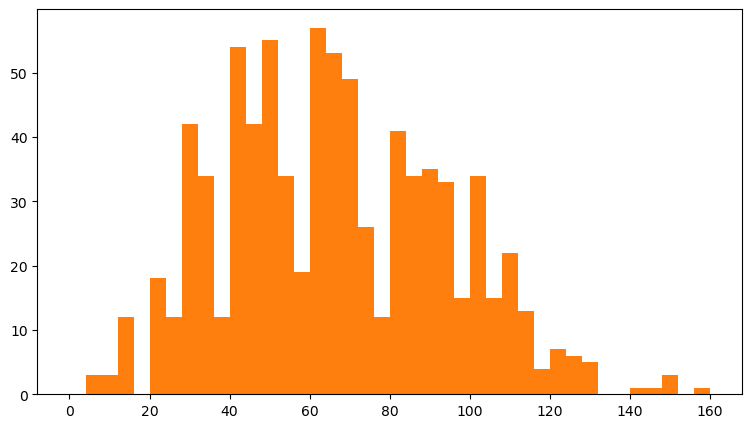

In [7]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [20, 5])

# histogram on left, example of too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
# plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
# bins = np.arange(0, pokemon['speed'].max() + 1, 1)
plt.hist(data = pokemon, x = 'speed', bins = bins);

First of all, plt.figure(figsize = [20, 5])creates a new Figure, with the "figsize" argument setting the width and height of the overall figure to 20 inches by 5 inches, respectively. Even if we don't assign any variable to return the function's output, Python will still implicitly know that further plotting calls that need a Figure will refer to that Figure as the active one.

Then, plt.subplot(1, 2, 1) creates a new Axes in our Figure, its size determined by the subplot() function arguments. The first two arguments says to divide the figure into one row and two columns, and the third argument says to create a new Axes in the first slot. Slots are numbered from left to right in rows from top to bottom. Note in particular that the index numbers start at 1 (rather than the usual Python indexing starting from 0). (You'll see the indexing a little better in the example at the end of the page.) Again, Python will implicitly set that Axes as the current Axes, so when the plt.hist() call comes, the histogram is plotted in the left-side subplot.

Finally, plt.subplot(1, 2, 2) creates a new Axes in the second subplot slot, and sets that one as the current Axes. Thus, when the next plt.hist() call comes, the histogram gets drawn in the right-side subplot.


## Additional Techniques

To close this page, we'll quickly run through a few other ways of dealing with Axes and subplots. The techniques above should suffice for basic plot creation, but you might want to keep the following in the back of your mind as additional tools to break out as needed.

If you don't assign Axes objects as they're created, you can retrieve the current Axes using ax = plt.gca(), or you can get a list of all Axes in a Figure fig by using axes = fig.get_axes(). As for creating subplots, you can use fig.add_subplot() in the same way as plt.subplot() above. If you already know that you're going to be creating a bunch of subplots, you can use the plt.subplots() function:


## Example 4. Demonstrate pyplot.sca() and pyplot.text() to generate a grid of subplots

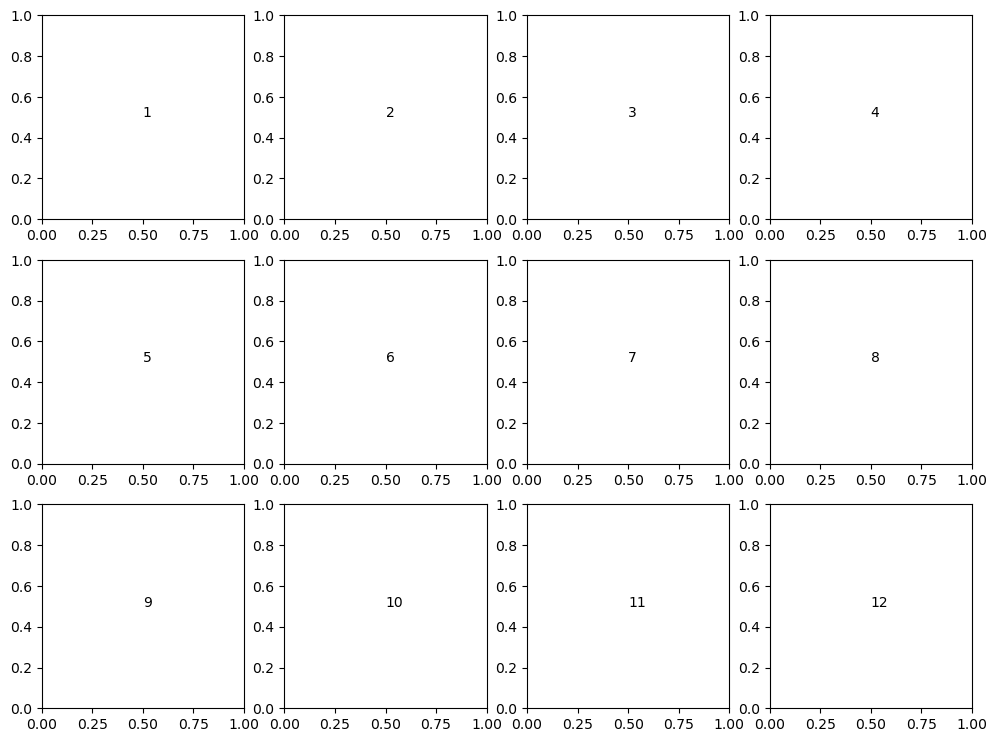

In [8]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 9

fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

As a special note for the text, the Axes limits are [0,1] on each Axes by default, and we increment the iterator counter i by 1 to get the subplot index, if we were creating the subplots through subplot(). (Reference: plt.sca(), plt.text())